In [1]:
import os
from importlib import reload
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from cut_video_demo_tensor import mainn as net_predict_path
#from cut_video_demo_tensor import net_image as net_predict_image

In [7]:
net_predict_image(image2)

[[523, 183, 86, 212]]

In [5]:
def display(img):
    plt.imshow(img, 'gray')
    plt.show()

In [6]:
net_predict_path(r'C:\Users\Yuriy\Google\VideoData\Frames\video_frame_1305.jpeg')

NameError: name 'net_predict_path' is not defined

In [20]:
image2 = cv2.cvtColor(cv2.imread(r'C:\Users\Yuriy\Google\VideoData\Frames\video_frame_1305.jpeg'), cv2.COLOR_BGR2GRAY)

In [21]:
image2 = cv2.imread(r'C:\Users\Yuriy\Google\VideoData\Frames\video_frame_1305.jpeg')

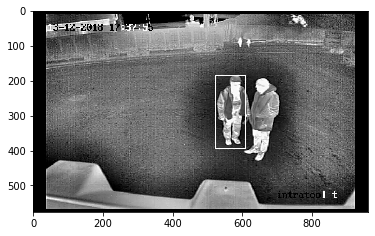

In [12]:
x1, y1, w, h = 523,183,86,211
display(cv2.rectangle(image2, (x1, y1), (x1 + w, y1 + h), (255,255,0), 2))

In [1]:
json_folder = "Groundtruth&Predictions(json)//"

video_dataset = {}
with open(json_folder + "video_groundtruth.json", "r") as read_file:
    video_dataset = json.load(read_file)
FLIR_dataset = {}
with open(json_folder + "FLIR_val_groundtruth.json", "r") as read_file:
    FLIR_dataset = json.load(read_file)

FileNotFoundError: [Errno 2] No such file or directory: 'Groundtruth&Predictions(json)//video_groundtruth.json'

In [ ]:
video_path = r'C:\Users\admin\Google\HumanDetection\Data\video.mp4'
cap = cv2.VideoCapture(video_path)

start = time.time()

predictions = {}
first_frame = 1000
current_frame = -1

while(cap.isOpened()):
    current_frame += 1
    
    ret, frame = cap.read()
    
    if (current_frame < first_frame):
        start = time.time()
        continue
    
    if (current_frame == 1500):
        break
    

    im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("im", im)
    
    
    thresholds, masks = full_method(im, L = 2**8, M=128)
    N = 8
    thresh_val = thresholds[-1]
    den = whiteDensity(im, n = N, val = thresh_val)  

    sym = symm(den, 0.1)
    sym = np.array([[sym[i] for j in range(N)] for i in range(len(sym))]).reshape(-1,)
    
    sym_im = np.array([[im[i,j] for j in range(im.shape[1])]*sym for i in range(im.shape[0])], dtype = np.uint8)
    cv2.imshow("symm_im", sym_im)

    regions, reg_masks = getRegionsAndMasks(im, sym)
    drawContours(frame, regions, reg_masks)
    
    
    net_predict(r'C:\Users\Yuriy\Google\VideoData\Frames\video_frame_1305.jpeg')
    
    
    with open('predictions.json', 'w') as outfile:
        json.dump(predictions, outfile)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
end = time.time()

print("Average FPS:", (current_frame-first_frame)/(end-start))


cap.release()
cv2.destroyAllWindows()

In [8]:
%load_ext Cython

In [20]:
%%cython

cdef int a = 0
for i in range(10):
    a += i

cdef char ch
cdef 
print(a)

45


In [26]:
%%cython
cdef extern from "<iostream>" namespace "std":
    ostream cout
 #   istream cin
cdef int a
#cin >> a;
cout << a;


Error compiling Cython file:
------------------------------------------------------------
...
cdef extern from "<iostream>" namespace "std":
    ostream cout
   ^
------------------------------------------------------------

C:\Users\Yuriy\.ipython\cython\_cython_magic_b8eb73bcd26ce74a1127470bad181ddf.pyx:2:4: 'ostream' is not a type identifier


In [27]:
%%cython
scanf("%d%d", &i, &j);


Error compiling Cython file:
------------------------------------------------------------
...
scanf("%d%d", &i, &j);
^
------------------------------------------------------------

C:\Users\Yuriy\.ipython\cython\_cython_magic_32f0ce60154ef94d271eecf4c52b04dc.pyx:1:0: undeclared name not builtin: scanf

Error compiling Cython file:
------------------------------------------------------------
...
scanf("%d%d", &i, &j);
              ^
------------------------------------------------------------

C:\Users\Yuriy\.ipython\cython\_cython_magic_32f0ce60154ef94d271eecf4c52b04dc.pyx:1:15: undeclared name not builtin: i

Error compiling Cython file:
------------------------------------------------------------
...
scanf("%d%d", &i, &j);
             ^
------------------------------------------------------------

C:\Users\Yuriy\.ipython\cython\_cython_magic_32f0ce60154ef94d271eecf4c52b04dc.pyx:1:14: Taking address of non-lvalue (type Python object)

Error compiling Cython file:
------------------

In [33]:
file = open('input.txt', 'r')
a, b = map(int, file.read().split())
return a + b

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

In [35]:
%%cython
cdef int a
cin >> a


Error compiling Cython file:
------------------------------------------------------------
...
cdef int a
cin >> a
^
------------------------------------------------------------

C:\Users\Yuriy\.ipython\cython\_cython_magic_92628af29aa5165b3a1c8a45ba2e8331.pyx:2:0: undeclared name not builtin: cin


In [26]:
import numpy as np
import os
import sys
import tensorflow as tf
import cv2

#sys.path.append("..")

def net_predict(img, source):
    if source == 'video':
        PATH_TO_CKPT = '../ssd_mobilenet_v2_coco_2020_02_02/frozen_inference_graph.pb'
    elif source == 'FLIR':
        PATH_TO_CKPT = '../ssd_mobilenet_v2_coco_2020_02_17/frozen_inference_graph.pb'
    else:
        assert(False)
        
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
            
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            frame = img
            rows = frame.shape[0]
            cols = frame.shape[1]
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(frame, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            # Using Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            print("detected = "+str(num_detections[0]))
            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            # Visualize only detected boxes
            print('num_detections =', num_detections)
            if (num_detections>0):
                for i in range(0,int(num_detections[0])):
                    # Check scores for visualise
                    if scores[i] < 0.2 :
                        continue
                    detection = boxes[i]
                    print(str(detection) +' score='+ str(scores[i] ) + ' cols='+str(cols) + ' rows='+str(rows))
                    left = detection[1] * cols
                    top = detection[0] * rows
                    right = detection[3] * cols
                    bottom = detection[2] * rows
                    cv2.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

            #cv2.imshow('object detection', cv2.resize(frame, (800,600)))
            cv2.imshow('object detection', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
    cv2.destroyAllWindows()        
    

In [3]:
image2 = cv2.imread(r'C:\Users\Yuriy\Google\VideoData\Frames\video_frame_1409.jpeg')

In [6]:
net_predict(image2, 'video')

True

In [ ]:
1409
detected = 2.0
[0.12165289 0.5983616  0.20686741 0.6226649 ] score=0.5296637 cols=960 rows=576
[0.25594229 0.5599951  0.5898838  0.6647722 ] score=0.36976978 cols=960 rows=576

In [22]:
image2.shape

(576, 960, 3)

In [37]:
# Example of using a neural Tensorflow network without OpenCV.
# This code is compatible with networks built on Tensorflow version 1.14, 1.15

import numpy as np
import os
import sys
import tensorflow as tf
import cv2

media_src = r'C:\Users\Yuriy\Google\VideoData\video.mp4'
cap = cv2.VideoCapture(media_src)

sys.path.append("..")

PATH_TO_CKPT = '../ssd_mobilenet_v2_coco_2020_02_02/frozen_inference_graph.pb'
PATH_TO_CKPT = '../ssd_mobilenet_v2_coco_2020_02_17/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
num_f = -1

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        while True:
            num_f += 1
            print(num_f)
            ret, frame = cap.read()
            if ret == False:
                break
            rows = frame.shape[0]
            cols = frame.shape[1]
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(frame, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            # Using Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            print("detected = "+str(num_detections[0]))
            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            # Visualize only detected boxes
            if (num_detections>0):
                for i in range(0,int(num_detections[0])):
                    # Check scores for visualise
                    if scores[i] < 0.2 :
                        continue
                    detection = boxes[i]
                    print(str(detection) +' score='+ str(scores[i] ) + ' cols='+str(cols) + ' rows='+str(rows))
                    left = detection[1] * cols
                    top = detection[0] * rows
                    right = detection[3] * cols
                    bottom = detection[2] * rows
                    cv2.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (23, 230, 210), thickness=2)

            #cv2.imshow('object detection', cv2.resize(frame, (800,600)))

            cv2.imshow('object detection', frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
cv2.destroyAllWindows()

0
detected = 2.0
[0.16189796 0.50829685 0.2903144  0.55130935] score=0.6960665 cols=960 rows=576
[0.42464173 0.70971584 0.86878633 0.8309593 ] score=0.5134754 cols=960 rows=576
1
detected = 2.0
[0.16176882 0.5067196  0.2920221  0.5518395 ] score=0.74526864 cols=960 rows=576
[0.4257567 0.7087999 0.875978  0.8393164] score=0.6284022 cols=960 rows=576
2
detected = 2.0
[0.1609188  0.50791335 0.29163772 0.55282307] score=0.837724 cols=960 rows=576
[0.4134814  0.6999872  0.9122456  0.84728205] score=0.5497802 cols=960 rows=576
3
detected = 2.0
[0.16086403 0.50851595 0.29121283 0.55414236] score=0.91308373 cols=960 rows=576
[0.41035512 0.6999495  0.9260682  0.86226547] score=0.60212755 cols=960 rows=576
4
detected = 2.0
[0.16130885 0.510573   0.29150072 0.555128  ] score=0.9469389 cols=960 rows=576
[0.40946323 0.70030737 0.92859167 0.86628675] score=0.5642566 cols=960 rows=576
5
detected = 2.0
[0.1596007  0.5118177  0.29291472 0.55709803] score=0.9097177 cols=960 rows=576
[0.42167446 0.707077

detected = 1.0
[0.156498   0.53744906 0.28073153 0.5813251 ] score=0.9071845 cols=960 rows=576
71
detected = 1.0
[0.15622951 0.537447   0.2799394  0.58063436] score=0.87392414 cols=960 rows=576
72
detected = 1.0
[0.1552424  0.5360318  0.27903643 0.580115  ] score=0.7792861 cols=960 rows=576
73
detected = 1.0
[0.15456232 0.53522164 0.2796732  0.5798618 ] score=0.7802101 cols=960 rows=576
74
detected = 1.0
[0.15445909 0.5354236  0.27837896 0.57859904] score=0.8047807 cols=960 rows=576
75
detected = 1.0
[0.1543303  0.53683954 0.2764643  0.57754284] score=0.8552407 cols=960 rows=576
76
detected = 1.0
[0.15443297 0.53695154 0.27675653 0.57701373] score=0.8572725 cols=960 rows=576
77
detected = 1.0
[0.15347481 0.53637016 0.27607846 0.57751703] score=0.8358657 cols=960 rows=576
78
detected = 1.0
[0.1542134 0.5371792 0.2774151 0.5760234] score=0.8897519 cols=960 rows=576
79
detected = 1.0
[0.15402576 0.5373103  0.2771223  0.576991  ] score=0.87391853 cols=960 rows=576
80
detected = 1.0
[0.1539

detected = 1.0
[0.15141872 0.5396694  0.25502416 0.5718328 ] score=0.9781202 cols=960 rows=576
155
detected = 1.0
[0.15137139 0.54068327 0.2530322  0.57193315] score=0.9793793 cols=960 rows=576
156
detected = 1.0
[0.15194628 0.54123026 0.25062138 0.5720753 ] score=0.9861877 cols=960 rows=576
157
detected = 1.0
[0.15180236 0.5411294  0.24986476 0.5723651 ] score=0.98697376 cols=960 rows=576
158
detected = 1.0
[0.15160212 0.54129285 0.25019386 0.5723719 ] score=0.98552394 cols=960 rows=576
159
detected = 1.0
[0.15147069 0.5421734  0.24932823 0.5725509 ] score=0.99028754 cols=960 rows=576
160
detected = 1.0
[0.15116963 0.5422167  0.24908182 0.5726022 ] score=0.9907837 cols=960 rows=576
161
detected = 1.0
[0.14988022 0.5426161  0.24930884 0.5730498 ] score=0.98927534 cols=960 rows=576
162
detected = 1.0
[0.14978343 0.5430165  0.24952719 0.5733349 ] score=0.99037117 cols=960 rows=576
163
detected = 1.0
[0.14949985 0.54266983 0.24975254 0.5728403 ] score=0.9901153 cols=960 rows=576
164
detec

detected = 1.0
[0.1467942  0.5549397  0.23303112 0.5791643 ] score=0.9863246 cols=960 rows=576
239
detected = 1.0
[0.14632545 0.55526745 0.2336152  0.5799955 ] score=0.9838045 cols=960 rows=576
240
detected = 1.0
[0.14537081 0.5553519  0.2338242  0.58054525] score=0.9846754 cols=960 rows=576
241
detected = 1.0
[0.14527808 0.55554587 0.23435144 0.58114916] score=0.98049045 cols=960 rows=576
242
detected = 1.0
[0.14607023 0.5553812  0.23488547 0.58110976] score=0.98185134 cols=960 rows=576
243
detected = 1.0
[0.14592506 0.55598485 0.234865   0.58155286] score=0.97575796 cols=960 rows=576
244
detected = 1.0
[0.14580089 0.5556385  0.23438168 0.5812647 ] score=0.9765098 cols=960 rows=576
245
detected = 1.0
[0.14579248 0.5552312  0.23315626 0.58073676] score=0.9761469 cols=960 rows=576
246
detected = 1.0
[0.14568949 0.55595005 0.2333805  0.5811355 ] score=0.9814904 cols=960 rows=576
247
detected = 1.0
[0.14524111 0.555811   0.23324099 0.58114   ] score=0.9829424 cols=960 rows=576
248
detecte

detected = 1.0
[0.14281088 0.57364184 0.22437835 0.59794205] score=0.9161302 cols=960 rows=576
323
detected = 1.0
[0.14332783 0.5739431  0.22474489 0.5975917 ] score=0.93810135 cols=960 rows=576
324
detected = 1.0
[0.14215817 0.5746663  0.22495194 0.5979627 ] score=0.93432343 cols=960 rows=576
325
detected = 1.0
[0.14140047 0.5748154  0.22473966 0.5986302 ] score=0.9069808 cols=960 rows=576
326
detected = 1.0
[0.14216158 0.57526815 0.22493798 0.598794  ] score=0.9231036 cols=960 rows=576
327
detected = 1.0
[0.14169379 0.57525975 0.22571056 0.59894747] score=0.90290195 cols=960 rows=576
328
detected = 1.0
[0.14128232 0.5755163  0.22576034 0.5989956 ] score=0.87646484 cols=960 rows=576
329
detected = 1.0
[0.14087845 0.5753195  0.22609611 0.59924245] score=0.87225294 cols=960 rows=576
330
detected = 1.0
[0.14039513 0.5750731  0.22437605 0.599275  ] score=0.86987793 cols=960 rows=576
331
detected = 1.0
[0.14023091 0.57508594 0.22432889 0.59978193] score=0.80155617 cols=960 rows=576
332
det

detected = 1.0
[0.13531283 0.58360535 0.2161015  0.60759133] score=0.8929554 cols=960 rows=576
407
detected = 1.0
[0.13459185 0.58358794 0.21572226 0.6076521 ] score=0.87602663 cols=960 rows=576
408
detected = 1.0
[0.13537337 0.5837291  0.21652438 0.6081392 ] score=0.8960322 cols=960 rows=576
409
detected = 1.0
[0.13526689 0.5843843  0.21555151 0.608287  ] score=0.90337634 cols=960 rows=576
410
detected = 1.0
[0.13570547 0.5841342  0.2157565  0.6078322 ] score=0.88747567 cols=960 rows=576
411
detected = 1.0
[0.13565494 0.5839784  0.21600915 0.6081557 ] score=0.87274116 cols=960 rows=576
412
detected = 1.0
[0.13518883 0.584028   0.21584181 0.60804653] score=0.8704978 cols=960 rows=576
413
detected = 1.0
[0.1351564  0.5834595  0.21678725 0.6070647 ] score=0.81945366 cols=960 rows=576
414
detected = 1.0
[0.1350116  0.5834094  0.21647878 0.60706306] score=0.8090458 cols=960 rows=576
415
detected = 1.0
[0.13487676 0.58363086 0.21734464 0.6071684 ] score=0.8296983 cols=960 rows=576
416
detec

detected = 1.0
[0.13648356 0.570311   0.20618771 0.5933688 ] score=0.88346255 cols=960 rows=576
491
detected = 1.0
[0.13487618 0.56950504 0.20793466 0.59309953] score=0.83939713 cols=960 rows=576
492
detected = 1.0
[0.13368914 0.5687909  0.20937172 0.592867  ] score=0.7951983 cols=960 rows=576
493
detected = 1.0
[0.13387856 0.5691812  0.20922607 0.59274054] score=0.8065971 cols=960 rows=576
494
detected = 1.0
[0.13357985 0.5688422  0.21122172 0.5934409 ] score=0.68871784 cols=960 rows=576
495
detected = 1.0
[0.13150956 0.5678426  0.21142863 0.5928587 ] score=0.74756086 cols=960 rows=576
496
detected = 1.0
[0.1288513  0.567417   0.21089911 0.59238577] score=0.7439939 cols=960 rows=576
497
detected = 1.0
[0.12944545 0.5675179  0.2102208  0.5920752 ] score=0.8179311 cols=960 rows=576
498
detected = 1.0
[0.13046686 0.5678208  0.21019231 0.5916227 ] score=0.921089 cols=960 rows=576
499
detected = 1.0
[0.13174872 0.5687336  0.20924379 0.59196043] score=0.91755414 cols=960 rows=576
500
detect

detected = 3.0
[0.33158827 0.229943   0.7267616  0.37271062] score=0.53364444 cols=960 rows=576
[0.17098397 0.90372556 0.31208324 0.95025367] score=0.4475936 cols=960 rows=576
[0.53129256 0.11700986 0.93239367 0.29789972] score=0.3882507 cols=960 rows=576
545
detected = 4.0
[0.52641076 0.13697565 0.92631346 0.31480545] score=0.5317561 cols=960 rows=576
[0.3328817 0.2349126 0.7126963 0.3784351] score=0.40845674 cols=960 rows=576
[0.17115381 0.9032619  0.31177342 0.9470011 ] score=0.40093386 cols=960 rows=576
[0.13145235 0.5603461  0.19941041 0.5850642 ] score=0.30314153 cols=960 rows=576
546
detected = 3.0
[0.52297914 0.14131445 0.9248991  0.32540062] score=0.48303747 cols=960 rows=576
[0.16814227 0.901243   0.31139886 0.94625187] score=0.47669956 cols=960 rows=576
[0.32460827 0.2477711  0.7147483  0.38195097] score=0.36725995 cols=960 rows=576
547
detected = 3.0
[0.16610023 0.90047276 0.3082177  0.9445462 ] score=0.491598 cols=960 rows=576
[0.32112524 0.25356993 0.711071   0.3873053 ] 

detected = 4.0
[0.1359514  0.5623113  0.19869241 0.5843719 ] score=0.7688386 cols=960 rows=576
[0.15866256 0.8630071  0.2909537  0.90497   ] score=0.59361905 cols=960 rows=576
[0.54430187 0.42655823 0.92191994 0.6093354 ] score=0.44265366 cols=960 rows=576
[0.30680245 0.4383249  0.67235225 0.566022  ] score=0.33702224 cols=960 rows=576
573
detected = 4.0
[0.13582212 0.56177443 0.20059592 0.58384603] score=0.858504 cols=960 rows=576
[0.1561584  0.8614471  0.29183418 0.90492237] score=0.50733954 cols=960 rows=576
[0.5344988  0.45597547 0.9500822  0.6135879 ] score=0.37029383 cols=960 rows=576
[0.30885458 0.4463476  0.6676374  0.5759944 ] score=0.3543898 cols=960 rows=576
574
detected = 4.0
[0.13536997 0.56121254 0.20223774 0.5842209 ] score=0.78276885 cols=960 rows=576
[0.15490146 0.86176217 0.29168063 0.9058089 ] score=0.42391998 cols=960 rows=576
[0.53067225 0.46373537 0.9473186  0.6166319 ] score=0.35471016 cols=960 rows=576
[0.31174055 0.4499945  0.66543067 0.57503   ] score=0.333688

detected = 3.0
[0.3200646  0.64096487 0.79032475 0.7714449 ] score=0.65899837 cols=960 rows=576
[0.14047897 0.82372206 0.26477695 0.8675706 ] score=0.49353516 cols=960 rows=576
[0.61537755 0.7772608  0.9694395  0.97005796] score=0.31418556 cols=960 rows=576
601
detected = 2.0
[0.32050085 0.64689577 0.785642   0.77735054] score=0.8760631 cols=960 rows=576
[0.13718602 0.82335764 0.26952896 0.86986274] score=0.4882994 cols=960 rows=576
602
detected = 3.0
[0.32740712 0.65830666 0.781222   0.78648823] score=0.6063798 cols=960 rows=576
[0.13960737 0.8223126  0.27047417 0.87127864] score=0.39673483 cols=960 rows=576
[0.13420595 0.5613143  0.19846733 0.58367556] score=0.31306368 cols=960 rows=576
603
detected = 0.0
604
detected = 0.0
605
detected = 1.0
[0.31862757 0.68894166 0.8071178  0.81996065] score=0.40561193 cols=960 rows=576
606
detected = 1.0
[0.329149   0.69250005 0.80874455 0.823893  ] score=0.42330337 cols=960 rows=576
607
detected = 1.0
[0.34525725 0.69253856 0.8046229  0.8332072 ]

detected = 1.0
[0.14044441 0.74874437 0.24589606 0.7836617 ] score=0.8884555 cols=960 rows=576
653
detected = 1.0
[0.13969918 0.7472378  0.24599616 0.7832774 ] score=0.86724025 cols=960 rows=576
654
detected = 1.0
[0.14089572 0.74595314 0.24460581 0.7813526 ] score=0.90258455 cols=960 rows=576
655
detected = 1.0
[0.14070156 0.7443973  0.24336791 0.78052914] score=0.8847054 cols=960 rows=576
656
detected = 1.0
[0.13908616 0.7431414  0.24269861 0.77976143] score=0.87827456 cols=960 rows=576
657
detected = 1.0
[0.14014176 0.7420622  0.24050859 0.7767979 ] score=0.9010466 cols=960 rows=576
658
detected = 1.0
[0.13741055 0.74061954 0.24070135 0.7742591 ] score=0.90412056 cols=960 rows=576
659
detected = 1.0
[0.13737139 0.7400308  0.23859105 0.7706894 ] score=0.89710593 cols=960 rows=576
660
detected = 1.0
[0.13730106 0.7396711  0.24034837 0.769853  ] score=0.8824793 cols=960 rows=576
661
detected = 1.0
[0.13623324 0.73689914 0.23975265 0.7682382 ] score=0.90113586 cols=960 rows=576
662
dete

detected = 1.0
[0.12666851 0.64676243 0.21952227 0.6768139 ] score=0.77672577 cols=960 rows=576
737
detected = 1.0
[0.12416276 0.647019   0.22049266 0.676679  ] score=0.62858635 cols=960 rows=576
738
detected = 1.0
[0.12576613 0.6471123  0.22122014 0.6766018 ] score=0.6552381 cols=960 rows=576
739
detected = 1.0
[0.12615114 0.6463212  0.22145164 0.6762459 ] score=0.63294834 cols=960 rows=576
740
detected = 1.0
[0.12537394 0.6463282  0.22395061 0.6747329 ] score=0.62605995 cols=960 rows=576
741
detected = 1.0
[0.12413174 0.6455108  0.22176552 0.6730741 ] score=0.68864584 cols=960 rows=576
742
detected = 1.0
[0.12579489 0.64529175 0.22143233 0.67280775] score=0.80256075 cols=960 rows=576
743
detected = 1.0
[0.12601009 0.6438811  0.21975863 0.6725944 ] score=0.849573 cols=960 rows=576
744
detected = 1.0
[0.12608527 0.6426078  0.22025986 0.6732439 ] score=0.84067035 cols=960 rows=576
745
detected = 1.0
[0.12739632 0.6414255  0.2179327  0.6731036 ] score=0.77468634 cols=960 rows=576
746
det

detected = 1.0
[0.12708889 0.5805868  0.20038332 0.60596013] score=0.59494466 cols=960 rows=576
821
detected = 1.0
[0.1273079  0.5800778  0.20110007 0.60562366] score=0.6078281 cols=960 rows=576
822
detected = 1.0
[0.12732632 0.57996917 0.20131345 0.6054683 ] score=0.6168399 cols=960 rows=576
823
detected = 1.0
[0.12654606 0.57959735 0.20129976 0.60446095] score=0.57965475 cols=960 rows=576
824
detected = 1.0
[0.12656376 0.57967556 0.20124969 0.6045004 ] score=0.585743 cols=960 rows=576
825
detected = 1.0
[0.12705484 0.5799051  0.20323688 0.6046975 ] score=0.5912419 cols=960 rows=576
826
detected = 1.0
[0.12737155 0.57982844 0.20326269 0.6045485 ] score=0.5922852 cols=960 rows=576
827
detected = 1.0
[0.12739757 0.57976896 0.20346132 0.60450274] score=0.5991343 cols=960 rows=576
828
detected = 1.0
[0.12742649 0.57947147 0.20348461 0.6043277 ] score=0.604372 cols=960 rows=576
829
detected = 1.0
[0.12737267 0.579443   0.2034701  0.6043372 ] score=0.5999126 cols=960 rows=576
830
detected =

detected = 1.0
[0.12559645 0.59157765 0.20419993 0.61891687] score=0.8181382 cols=960 rows=576
893
detected = 1.0
[0.12626232 0.5928946  0.20507385 0.6192265 ] score=0.78536433 cols=960 rows=576
894
detected = 1.0
[0.12784249 0.5933093  0.20281821 0.61897993] score=0.7521632 cols=960 rows=576
895
detected = 1.0
[0.12784514 0.5935195  0.20214733 0.61933714] score=0.6883266 cols=960 rows=576
896
detected = 1.0
[0.12735559 0.59366363 0.20301397 0.6195007 ] score=0.7274823 cols=960 rows=576
897
detected = 1.0
[0.12678449 0.59368855 0.20322265 0.61933535] score=0.7850646 cols=960 rows=576
898
detected = 1.0
[0.12705849 0.5937035  0.2037368  0.6187923 ] score=0.7973256 cols=960 rows=576
899
detected = 1.0
[0.12725976 0.59324694 0.20405361 0.6182269 ] score=0.87391484 cols=960 rows=576
900
detected = 1.0
[0.12772433 0.59416914 0.20169638 0.6171148 ] score=0.92151845 cols=960 rows=576
901
detected = 1.0
[0.12662916 0.5940284  0.20231007 0.617336  ] score=0.8763007 cols=960 rows=576
902
detecte

detected = 1.0
[0.11818321 0.5735839  0.18592288 0.5945515 ] score=0.9093133 cols=960 rows=576
999
detected = 1.0
[0.11812219 0.57467407 0.18749842 0.59672326] score=0.8067608 cols=960 rows=576
1000
detected = 1.0
[0.12045856 0.5757506  0.18544944 0.59667706] score=0.8362202 cols=960 rows=576
1001
detected = 1.0
[0.12003864 0.5745648  0.18571419 0.5960276 ] score=0.81536895 cols=960 rows=576
1002
detected = 1.0
[0.12010188 0.57590115 0.18531065 0.5973382 ] score=0.79655486 cols=960 rows=576
1003
detected = 1.0
[0.12006368 0.57586884 0.18449183 0.59682465] score=0.8053335 cols=960 rows=576
1004
detected = 1.0
[0.12049013 0.5753841  0.18475524 0.59675866] score=0.7702296 cols=960 rows=576
1005
detected = 1.0
[0.12034485 0.5771466  0.18421933 0.5983915 ] score=0.5868927 cols=960 rows=576
1006
detected = 1.0
[0.11970836 0.57747084 0.1852074  0.5988727 ] score=0.58852375 cols=960 rows=576
1007
detected = 1.0
[0.11866375 0.57883614 0.18439636 0.5999791 ] score=0.34320736 cols=960 rows=576
10

detected = 2.0
[0.11624996 0.60042304 0.1884165  0.6259318 ] score=0.6042854 cols=960 rows=576
[0.12153327 0.6500634  0.18908936 0.67406964] score=0.34548557 cols=960 rows=576
1069
detected = 2.0
[0.11553027 0.60079724 0.1884395  0.62567157] score=0.6379918 cols=960 rows=576
[0.12065929 0.65010387 0.18957633 0.67361885] score=0.32066217 cols=960 rows=576
1070
detected = 2.0
[0.11610749 0.60135067 0.18857926 0.62610805] score=0.6243013 cols=960 rows=576
[0.12139873 0.6512449  0.19036372 0.6747937 ] score=0.31342542 cols=960 rows=576
1071
detected = 2.0
[0.11639726 0.6016102  0.18855244 0.6265564 ] score=0.63299525 cols=960 rows=576
[0.12282462 0.6518097  0.18916495 0.67518294] score=0.32354015 cols=960 rows=576
1072
detected = 2.0
[0.11601673 0.6014683  0.1888249  0.6266539 ] score=0.6261284 cols=960 rows=576
[0.12229123 0.6506115  0.18949729 0.67441666] score=0.3139645 cols=960 rows=576
1073
detected = 2.0
[0.11592607 0.6017352  0.18861587 0.6271654 ] score=0.6019006 cols=960 rows=576


detected = 2.0
[0.11420503 0.594439   0.18936983 0.62094986] score=0.59914345 cols=960 rows=576
[0.366988   0.66588306 0.8486863  0.8184731 ] score=0.54485804 cols=960 rows=576
1123
detected = 2.0
[0.36511382 0.65922487 0.8351772  0.80826604] score=0.5461391 cols=960 rows=576
[0.11368774 0.59430367 0.19076027 0.6211211 ] score=0.5364877 cols=960 rows=576
1124
detected = 2.0
[0.11326867 0.5946109  0.18941563 0.6214018 ] score=0.54949677 cols=960 rows=576
[0.36133006 0.655481   0.8281802  0.79563475] score=0.41416857 cols=960 rows=576
1125
detected = 2.0
[0.11450638 0.5960605  0.18404137 0.62136936] score=0.7386998 cols=960 rows=576
[0.3586927  0.6498435  0.82665926 0.78910786] score=0.4784351 cols=960 rows=576
1126
detected = 2.0
[0.11479434 0.5971793  0.18560207 0.6226151 ] score=0.66120404 cols=960 rows=576
[0.35225517 0.64396363 0.8183127  0.7872104 ] score=0.5174049 cols=960 rows=576
1127
detected = 2.0
[0.11513289 0.5978069  0.18750742 0.62388295] score=0.58097476 cols=960 rows=576

detected = 3.0
[0.4506081  0.78155845 0.9528953  0.9478255 ] score=0.41490245 cols=960 rows=576
[0.11111847 0.5999264  0.19230956 0.6271351 ] score=0.3572724 cols=960 rows=576
[0.29022872 0.546171   0.6645833  0.66286725] score=0.32470363 cols=960 rows=576
1169
detected = 3.0
[0.4504534  0.77609813 0.9478048  0.94790816] score=0.40850547 cols=960 rows=576
[0.28924114 0.54561156 0.6664208  0.6623253 ] score=0.3523743 cols=960 rows=576
[0.11078921 0.60020703 0.19364959 0.6267596 ] score=0.34000707 cols=960 rows=576
1170
detected = 3.0
[0.45317072 0.7686215  0.9347368  0.9409123 ] score=0.39420813 cols=960 rows=576
[0.11133181 0.60024357 0.19288342 0.62633157] score=0.3806239 cols=960 rows=576
[0.28452837 0.5424125  0.6655911  0.6615974 ] score=0.3331526 cols=960 rows=576
1171
detected = 3.0
[0.1108804  0.60025334 0.19273317 0.62606025] score=0.3945949 cols=960 rows=576
[0.4426884  0.75491077 0.941124   0.92720836] score=0.37487608 cols=960 rows=576
[0.28428632 0.54336274 0.664538   0.660

detected = 2.0
[0.27763915 0.5299504  0.6292643  0.63911843] score=0.33999428 cols=960 rows=576
[0.11147606 0.59948707 0.19182673 0.62650716] score=0.3261909 cols=960 rows=576
1205
detected = 2.0
[0.11093202 0.5997989  0.19162026 0.6264516 ] score=0.33626297 cols=960 rows=576
[0.27722624 0.5303213  0.63000345 0.6386563 ] score=0.3353419 cols=960 rows=576
1206
detected = 2.0
[0.27807793 0.52908325 0.6323836  0.63793564] score=0.380292 cols=960 rows=576
[0.11107194 0.59981114 0.19146639 0.62640077] score=0.34585118 cols=960 rows=576
1207
detected = 2.0
[0.27738404 0.5297939  0.63293505 0.6371091 ] score=0.366076 cols=960 rows=576
[0.11052022 0.600433   0.1911166  0.62705064] score=0.36232358 cols=960 rows=576
1208
detected = 2.0
[0.2744593  0.52725905 0.6339867  0.6336474 ] score=0.3690843 cols=960 rows=576
[0.11064911 0.60021865 0.19112703 0.6269635 ] score=0.3625412 cols=960 rows=576
1209
detected = 2.0
[0.27496868 0.5278795  0.6341421  0.63613915] score=0.40076602 cols=960 rows=576
[0

detected = 3.0
[0.2735727  0.5323516  0.63868034 0.6317079 ] score=0.6546513 cols=960 rows=576
[0.11301562 0.59967864 0.19041482 0.6257365 ] score=0.37847185 cols=960 rows=576
[0.3376897  0.5994865  0.79152364 0.73576593] score=0.33275157 cols=960 rows=576
1241
detected = 3.0
[0.27444875 0.5326177  0.6384386  0.6322361 ] score=0.6832874 cols=960 rows=576
[0.11347467 0.5996842  0.19050393 0.626118  ] score=0.37709692 cols=960 rows=576
[0.33823448 0.60337764 0.7861752  0.73717886] score=0.35456932 cols=960 rows=576
1242
detected = 3.0
[0.2751127  0.53301764 0.6384904  0.6311182 ] score=0.68518424 cols=960 rows=576
[0.11301877 0.5997408  0.19045077 0.6261789 ] score=0.3644911 cols=960 rows=576
[0.33782429 0.6045863  0.77926666 0.7387603 ] score=0.30875766 cols=960 rows=576
1243
detected = 2.0
[0.27731228 0.5339124  0.6377091  0.6319592 ] score=0.62639713 cols=960 rows=576
[0.11276554 0.6001499  0.19007081 0.62691313] score=0.36393988 cols=960 rows=576
1244
detected = 3.0
[0.27876967 0.534

detected = 1.0
[0.1172922 0.6048084 0.2080574 0.630724 ] score=0.32256687 cols=960 rows=576
1281
detected = 2.0
[0.11781301 0.605106   0.20763624 0.6306542 ] score=0.33247182 cols=960 rows=576
[0.31115782 0.5842493  0.7670028  0.7330325 ] score=0.3111607 cols=960 rows=576
1282
detected = 3.0
[0.11841729 0.6047725  0.20635572 0.63027316] score=0.35121495 cols=960 rows=576
[0.30678618 0.57537293 0.7594813  0.7287259 ] score=0.31551856 cols=960 rows=576
[0.11941549 0.6400176  0.20039976 0.66568613] score=0.30308497 cols=960 rows=576
1283
detected = 2.0
[0.11746409 0.6054825  0.20661837 0.6304911 ] score=0.3362971 cols=960 rows=576
[0.3054934  0.56848466 0.75289494 0.72616875] score=0.31953305 cols=960 rows=576
1284
detected = 2.0
[0.11624627 0.60660875 0.19049399 0.6326618 ] score=0.32648605 cols=960 rows=576
[0.30865258 0.56406087 0.74551874 0.7233725 ] score=0.32015496 cols=960 rows=576
1285
detected = 2.0
[0.11690376 0.60697204 0.19052592 0.6332837 ] score=0.3450096 cols=960 rows=576
[

detected = 2.0
[0.11951431 0.6102188  0.20630473 0.63328475] score=0.50576764 cols=960 rows=576
[0.31443703 0.5489889  0.6803039  0.65313154] score=0.42512277 cols=960 rows=576
1329
detected = 2.0
[0.11976478 0.61080223 0.2069957  0.63386863] score=0.51112777 cols=960 rows=576
[0.3134779  0.55006886 0.6842998  0.6533023 ] score=0.43658102 cols=960 rows=576
1330
detected = 2.0
[0.12005278 0.6119712  0.20658973 0.63499504] score=0.49161142 cols=960 rows=576
[0.31214732 0.54982275 0.68388003 0.65356356] score=0.41802272 cols=960 rows=576
1331
detected = 2.0
[0.12017336 0.61190724 0.20602953 0.63553345] score=0.45843878 cols=960 rows=576
[0.31183472 0.5506368  0.6827886  0.65477675] score=0.40314835 cols=960 rows=576
1332
detected = 2.0
[0.11956766 0.6115771  0.20685261 0.6349135 ] score=0.4540267 cols=960 rows=576
[0.31094185 0.55081373 0.6830411  0.65576893] score=0.390674 cols=960 rows=576
1333
detected = 2.0
[0.11907233 0.61068785 0.20766994 0.63405406] score=0.41802472 cols=960 rows=5

detected = 3.0
[0.12044263 0.60269046 0.20586607 0.62676406] score=0.52527636 cols=960 rows=576
[0.27576774 0.5527174  0.6460537  0.67142063] score=0.36058915 cols=960 rows=576
[0.3788839  0.6756724  0.82238907 0.84424114] score=0.35654828 cols=960 rows=576
1371
detected = 3.0
[0.12069347 0.60194415 0.20523113 0.6265573 ] score=0.51147205 cols=960 rows=576
[0.38721207 0.68200576 0.8526695  0.8523618 ] score=0.37054694 cols=960 rows=576
[0.27144247 0.5514325  0.6427484  0.6696365 ] score=0.34480697 cols=960 rows=576
1372
detected = 3.0
[0.12038721 0.6021202  0.20557754 0.6269724 ] score=0.5404423 cols=960 rows=576
[0.27175218 0.5520772  0.63709    0.6677723 ] score=0.35385296 cols=960 rows=576
[0.4011873  0.6895941  0.87244904 0.8526117 ] score=0.35214156 cols=960 rows=576
1373
detected = 3.0
[0.11995034 0.6023247  0.20474412 0.6268755 ] score=0.5749354 cols=960 rows=576
[0.4190998 0.6937463 0.8895222 0.8573872] score=0.36036232 cols=960 rows=576
[0.27213353 0.55242735 0.6310451  0.6660

detected = 2.0
[0.12124991 0.59814185 0.2078107  0.6224082 ] score=0.5507662 cols=960 rows=576
[0.25801823 0.55973524 0.5883112  0.6635111 ] score=0.42470944 cols=960 rows=576
1409
detected = 2.0
[0.12165289 0.5983616  0.20686741 0.6226649 ] score=0.5296637 cols=960 rows=576
[0.25594229 0.5599951  0.5898838  0.6647722 ] score=0.36976978 cols=960 rows=576
1410
detected = 2.0
[0.12129168 0.5988124  0.20743044 0.6232032 ] score=0.5417562 cols=960 rows=576
[0.25467777 0.559995   0.5904872  0.6647312 ] score=0.38819292 cols=960 rows=576
1411
detected = 2.0
[0.12101834 0.5994907  0.2078067  0.6241985 ] score=0.53647333 cols=960 rows=576
[0.25324118 0.55946213 0.58922684 0.6637134 ] score=0.3984354 cols=960 rows=576
1412
detected = 2.0
[0.12134661 0.599649   0.20757528 0.62435025] score=0.53828055 cols=960 rows=576
[0.24814032 0.55862427 0.5890421  0.66332424] score=0.39581195 cols=960 rows=576
1413
detected = 2.0
[0.12174191 0.5994286  0.20796396 0.6239969 ] score=0.5685351 cols=960 rows=576

In [46]:
os.chdir(r'C:\Users\Yuriy\Net2\ocv_and_tf-master//')


In [47]:
os.getcwd() 

'C:\\Users\\Yuriy\\Net2\\ocv_and_tf-master'

In [48]:
path = r'C:\Users\Yuriy\Net2//'

In [5]:
import numpy as np
import os
import sys
import tensorflow as tf
import cv2

#sys.path.append("..")

def net_predict(img, source):
    path = r'C:\Users\Yuriy\Net2//'
    
    if source == 'video':
        PATH_TO_CKPT = path + '/ssd_mobilenet_v2_coco_2020_02_02/frozen_inference_graph.pb'
    elif source == 'FLIR':
        PATH_TO_CKPT = path + '/ssd_mobilenet_v2_coco_2020_02_17/frozen_inference_graph.pb'
    else:
        assert(False)
        
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
            
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            frame = img
            rows = frame.shape[0]
            cols = frame.shape[1]
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(frame, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            # Using Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            
            return num_detections[0] > 0